## Writing Micro-pipelines

[![](https://raw.githubusercontent.com/ploomber/ploomber/master/_static/open-in-jupyterlab.svg)](https://binder.ploomber.io/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fmicro-pipelines%252F1-intro.ipynb%26branch%3Dmaster)

The micro-pipelines API is the simplest way to organize your data analysis code, let'se how!

## Declare pipeline

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ploomber.micro import dag_from_functions

In [2]:
# each task is a function
def load():
    data = load_iris(as_frame=True)
    return data['frame']

# to create a dependency, add another task as argument
def clean(load):
    load["sepal-area"] = load["sepal length (cm)"] * load["sepal width (cm)"]
    return load

def fit(clean):
    X = clean.drop("target", axis="columns")
    y = clean.target

    X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.33, random_state=42)

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [3]:
# create the pipeline
dag = dag_from_functions([load, clean, fit], output="cache/1-intro")

## Plot and execute

  0%|          | 0/3 [00:00<?, ?it/s]

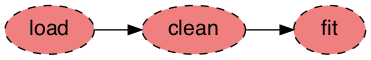

In [4]:
dag.plot()

In [5]:
# execute it
dag.build()

  0%|          | 0/3 [00:00<?, ?it/s]

name,Ran?,Elapsed (s),Percentage
load,True,0.012803,52.6374
clean,True,0.002655,10.9156
fit,True,0.008865,36.447


## Get outputs

In [6]:
# get outputs
dag['load'].load()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Rapid iterations

Let's say you modify one of the tasks:

*Note: in a real use-case, you'd edit the original cell.*

In [7]:
def clean(load):
    load["sepal-area"] = load["sepal length (cm)"] * load["sepal width (cm)"]
    # this is new!
    load["petal-area"] = load["petal length (cm)"] * load["petal width (cm)"]
    return load

  0%|          | 0/3 [00:00<?, ?it/s]

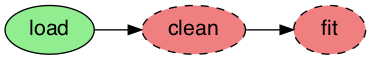

In [8]:
dag.plot()

Note that Ploomber detected you alreadt have the output for `load`, so it'll skip the task!

In [9]:
dag.build()

  0%|          | 0/2 [00:00<?, ?it/s]

name,Ran?,Elapsed (s),Percentage
clean,True,0.004356,35.5795
fit,True,0.007887,64.4205
load,False,0,0


Now our pipeline is up-to-date!

  0%|          | 0/3 [00:00<?, ?it/s]

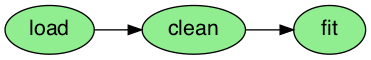

In [10]:
dag.plot()